In [ ]:
pip install pingouin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.4/204.4 kB 6.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from PIL import Image
import os
import pandas as pd
import seaborn as sns

# SVD to compress image

Pega o SVD da imagem e plota os valores singulares diagonais. Trunca o SVD para diferentes rank-r.

In [ ]:
# First, we load the image
A = imread("/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/cat.jpg")
X = np.mean(A, -1); # Convert RGB to grayscale
img = plt.imshow(X)

# Take the SVD
U, S, VT = np.linalg.svd (X, full_matrices=False)
S = np.diag(S)

# Approximate matrix with truncated SVD for various ranks r
for r in (5, 20, 100): # Construct approximate image
  Xapprox = U[:, :r] @ S[0:r, :r] @ VT[:r, :]
  img = plt.imshow(Xapprox)
  plt.show()

# Plot singular values and cumulative sum
plt.subplot(1,2,1)
plt.ylabel('Singular values')
plt.xlabel('r')
plt.semilogy(np.diag(S))
plt.subplot(1,2,2)
plt.ylabel('Cumulative sum')
plt.xlabel('r')
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))

# Least-squares fit of noisy data

Adiciona ruído e relaciona com a reta, usando pseudo-inverso para encontrar a solução mínimos-quadrados (regressão).

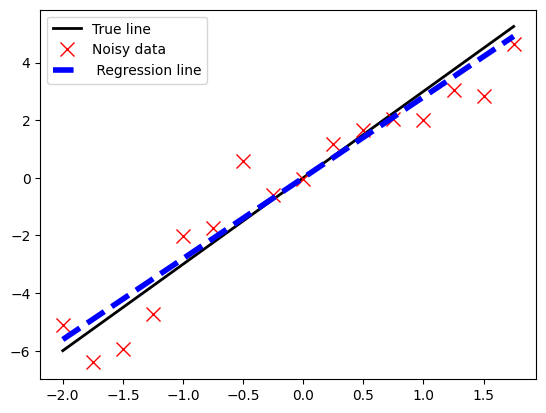

In [ ]:
x = 3 # True slope
a = np.arange(-2,2, 0.25)
a = a.reshape(-1, 1)
b = x*a + np.random.randn (*a. shape) # Add noise

plt.plot(a, x*a, '-k', linewidth = 2, label='True line') # True relationship
plt.plot (a, b, 'xr', ms = 10, label='Noisy data') # Noisy measurements

# Compute least-squares approximation with the SVD
U, S, VT = np.linalg.svd (a, full_matrices=False)
xtilde = VT.T@ np.linalg.inv (np. diag (S)) @ U.T@ b # Least- square fit

plt.plot(a,xtilde*a,'--b', linewidth = 4, label =' Regression line')
plt.legend()

# Alternative formulations of least squares
xtildel = VT.T @ np.linalg.inv(np.diag (S)) @ U.T @ b
xtilde2 = np.linalg.pinv(a) @ b

# Multi-linear Regression for Cement Heat Data

O dataset descreve 13 texturas de cimento com base em 4 ingredientes (A13x4). O objetivo é determinar o peso x que relata a proporção dos ingredientes para a geração de calor. Sistema linear Ax = b.

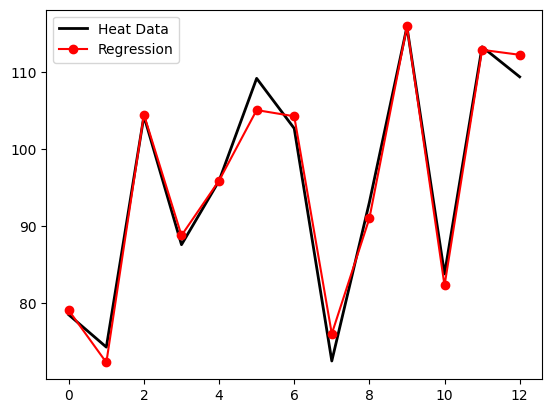

In [ ]:
# Load dataset
A = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/hald_ingredients.csv',delimiter=',')
b = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/hald_heat.csv',delimiter=',')

# Solve Ax=b using SVD
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

plt.plot(b, color='k', linewidth=2, label='Heat Data') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.legend()
plt.show()

# Boston Housing Data

Há 13 atributos correlacionados com o preço de 506 casas em Boston. É feita a regressão para predizer o valor das casas, em comparação com o valor real.

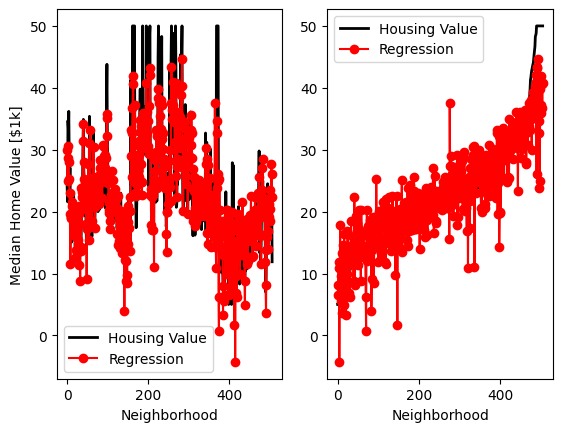

In [ ]:
# Load dataset
H = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/dataDrivenFiles/housing.data')
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)

# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], color='k', linewidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', color='r', linewidth=1.5, markersize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

# PCA Example


Códigos retirados de: https://www.fabriziomusacchio.com/blog/2023-06-16-pca_with_python/

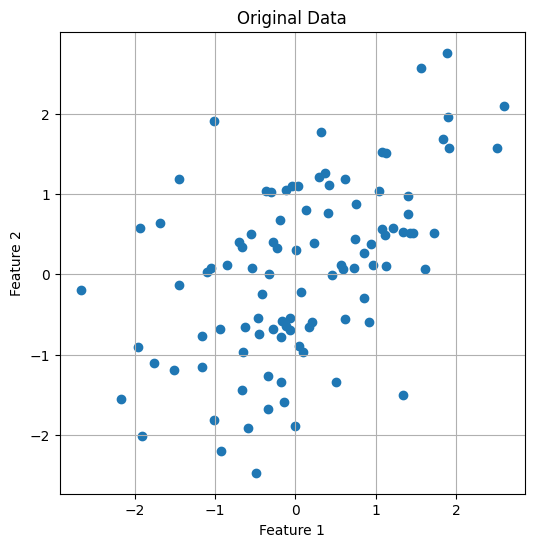

In [ ]:
# generate random two-dimensional data:
np.random.seed(13)
mean = [0, 0]
cov = [[1.5, 0.75], [0.75, 1.5]]
X = np.random.multivariate_normal(mean, cov, 100)

# visualization of the data:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xticks(np.arange(-2,2.1,1))
plt.yticks(np.arange(-2,2.1,1))
plt.grid(True)

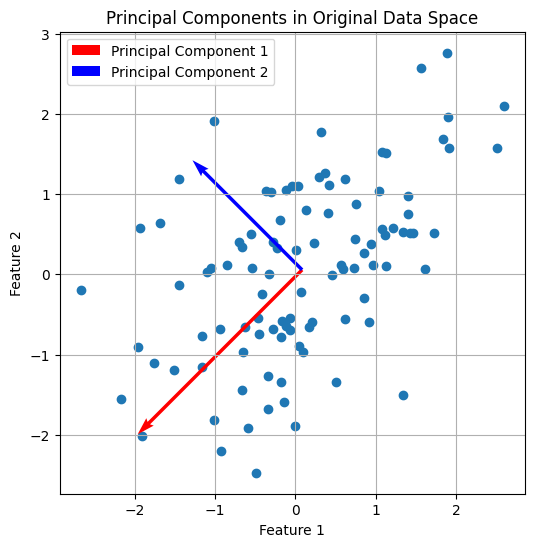

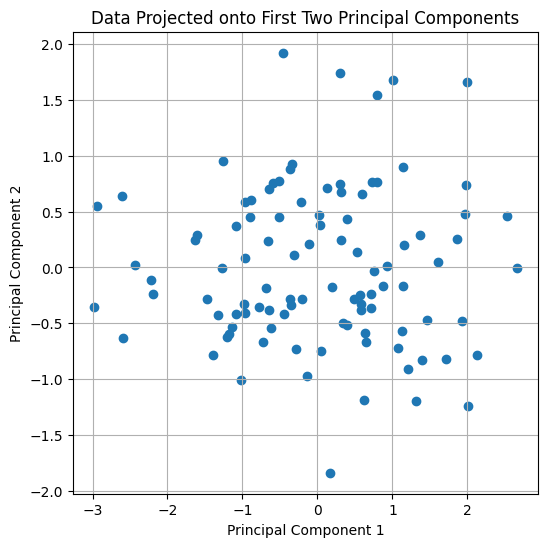

In [ ]:
# centering the data:
X_centered = X - np.mean(X, axis=0)

# scaling of the data:
X_scaled = X_centered / np.std(X_centered, axis=0)

# calculate of the covariance matrix:
cov_matrix = np.cov(X_scaled.T)

# calculation of the eigenvalues and eigenvectors:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# sorting the eigenvectors according to descending eigenvalues:
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# projecting the data onto the principal components:
projected_data = np.dot(X_scaled, eigenvectors[:, :2])

# visualization of the main components in the original space of data:
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1])
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), eigenvectors[0, 0], eigenvectors[1, 0],
           color='red', scale=2, label='Principal Component 1')
plt.quiver(np.mean(X[:, 0]), np.mean(X[:, 1]), eigenvectors[0, 1], eigenvectors[1, 1],
           color='blue', scale=3, label='Principal Component 2')
plt.title('Principal Components in Original Data Space')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

# visualization of the data on the first two main components:
plt.figure(figsize=(6, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1])
plt.title('Data Projected onto First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# PCA on Wine Dataset

Códigos retirados de: https://www.fabriziomusacchio.com/blog/2023-06-16-pca_with_python/

In [ ]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans

# load the wine dataset:
input_data = load_wine()
X = input_data.data

# normalize the data (z-score standardization):
X_Factor = StandardScaler().fit_transform(X)
df = pd.DataFrame(data=X_Factor, columns=input_data.feature_names)

df_full = df.copy()
df_full['Target'] = input_data.target
target_names = input_data.target_names

display(df_full.head())

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009,0
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242,0
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148,0
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574,0
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874,0


Estimando o número de CPs necessários. Há duas técnicas:

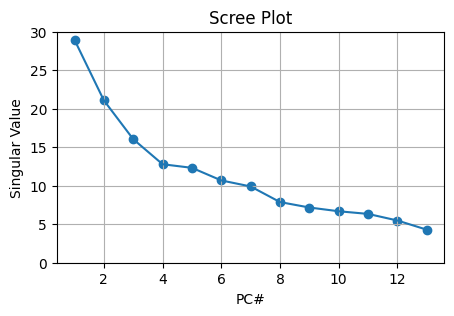

In [ ]:
# Explore the number of necessary PCA:
pca_explore = PCA(n_components=13)
pcas_explore = pca_explore.fit_transform(X_Factor)
ev = pca_explore.singular_values_

# S­cree plot for validating the number of pcs:
plt.figure(figsize=(5, 3))
plt.scatter(range(1, df.shape[1]+1), ev)
plt.plot(range(1, df.shape[1]+1), ev)
plt.title('Scree Plot')
plt.xlabel('PC#')
plt.ylabel('Singular Value')
plt.ylim(0, 30)
plt.grid()
plt.show()

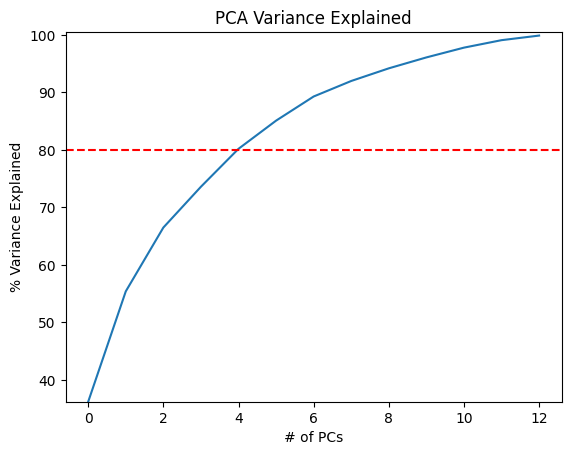

Explained variances for all 13 PCs:
 [0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]

Cumulative explained variance for the first 4 PCs: 0.6652996889318523


In [ ]:
var=np.cumsum(np.round(pca_explore.explained_variance_ratio_, decimals=3) *100)
plt.plot(var)
plt.ylabel("% Variance Explained")
plt.xlabel("# of PCs")
plt.title ("PCA Variance Explained")
plt.ylim(min(var), 100.5)
plt.axhline(y=80, color='r', linestyle='--')
plt.show()

print(f"Explained variances for all 13 PCs:\n {pca_explore.explained_variance_ratio_}\n")
print(f"Cumulative explained variance for the first 4 PCs: {np.sum(pca_explore.explained_variance_ratio_[0:3])}")

Vamos usar 3 Componetes Principais e a classe PCA do sklearn decomposition module:

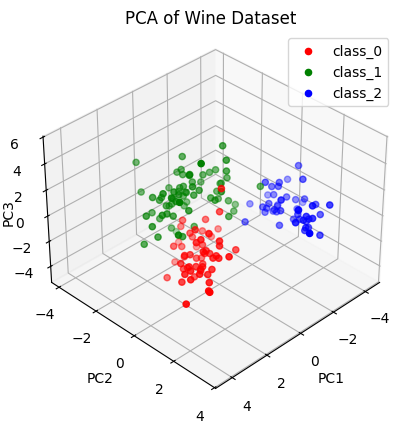

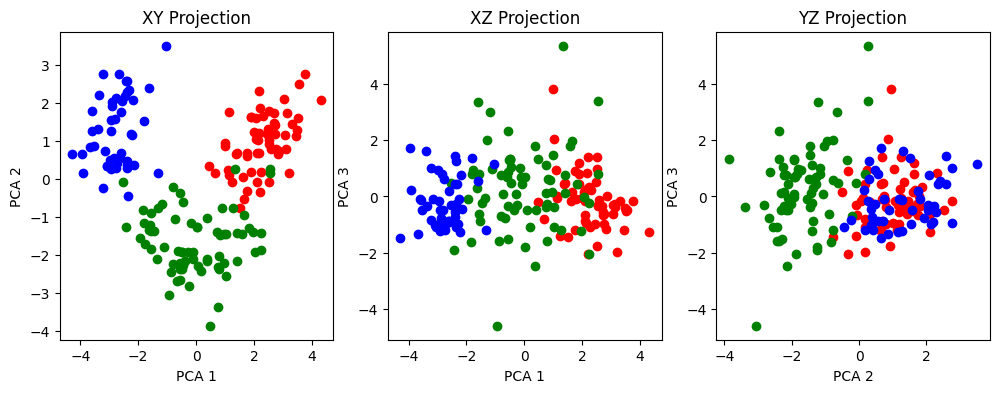

In [ ]:
# carrying out the PCA:
pca = PCA(n_components=3)
pcas = pca.fit_transform(X_Factor)

# create a DataFrame for the first (three) principle components:
principal_df = pd.DataFrame(data=pcas, columns=['PC1', 'PC2', 'PC3'])
final_df = pd.concat([principal_df,
                     pd.DataFrame(data=input_data.target,
                     columns=['target'])], axis=1)

# visualize the PCA results:
colors = ['r', 'g', 'b']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for target, color in zip(target_names, colors):
    indices = input_data.target == input_data.target_names.tolist().index(target)
    ax.scatter(pcas[indices, 0], pcas[indices, 1], pcas[indices, 2], c=color, label=target)
ax.view_init(elev=35, azim=45)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3', rotation=90)
ax.zaxis.labelpad=-4.9
ax.set_title('PCA of Wine Dataset')
ax.legend()
plt.show()

fig, axs = plt.subplots(1, 3, figsize=(12, 4))
# "XY" projection:
for target, color in zip(target_names, colors):
    indices = input_data.target == input_data.target_names.tolist().index(target)
    axs[0].scatter(pcas[indices, 0], pcas[indices, 1], c=color, label=target)
axs[0].set_xlabel('PCA 1')
axs[0].set_ylabel('PCA 2')
axs[0].set_title('XY Projection')

# "XZ" projection:
for target, color in zip(target_names, colors):
    indices = input_data.target == input_data.target_names.tolist().index(target)
    axs[1].scatter(pcas[indices, 0], pcas[indices, 2], c=color, label=target)
axs[1].set_xlabel('PCA 1')
axs[1].set_ylabel('PCA 3')
axs[1].set_title('XZ Projection')

# "YZ" projection:
for target, color in zip(target_names, colors):
    indices = input_data.target == input_data.target_names.tolist().index(target)
    axs[2].scatter(pcas[indices, 1], pcas[indices, 2], c=color, label=target)
axs[2].set_xlabel('PCA 2')
axs[2].set_ylabel('PCA 3')
axs[2].set_title('YZ Projection')
plt.show()


# Image denoising with PCA and Kernel PCA

Códigos retirados de: https://www.fabriziomusacchio.com/blog/2023-06-20-ai_image_denoising/

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow import keras
import tensorflow as tf
import random
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA

In [ ]:
# for reproducibility:
random.seed(0)        # Python
np.random.seed(0)     # NumPy (which Keras uses)
tf.random.set_seed(0) # TensorFlow

# load sample data from OpenML and normalize it:
X, y = fetch_openml(data_id=41082, as_frame=False, return_X_y=True, parser="pandas")
X = MinMaxScaler().fit_transform(X)

# split the data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, random_state=0, train_size=1_000, test_size=100)

# add some noise to the data:
rng = np.random.RandomState(0)
noise_scale = 0.25
noise = rng.normal(scale=noise_scale, size=X_test.shape)
X_test_noisy = X_test + noise
noise = rng.normal(scale=noise_scale, size=X_train.shape)
X_train_noisy = X_train + noise

# calculate the MSE and PSNR for the noisy test image set:
max_I = X_test.max()
mse_noisy_image  = np.mean((X_test - X_test_noisy) ** 2)
psnr_noisy_image = 10 * np.log10(max_I / mse_noisy_image)

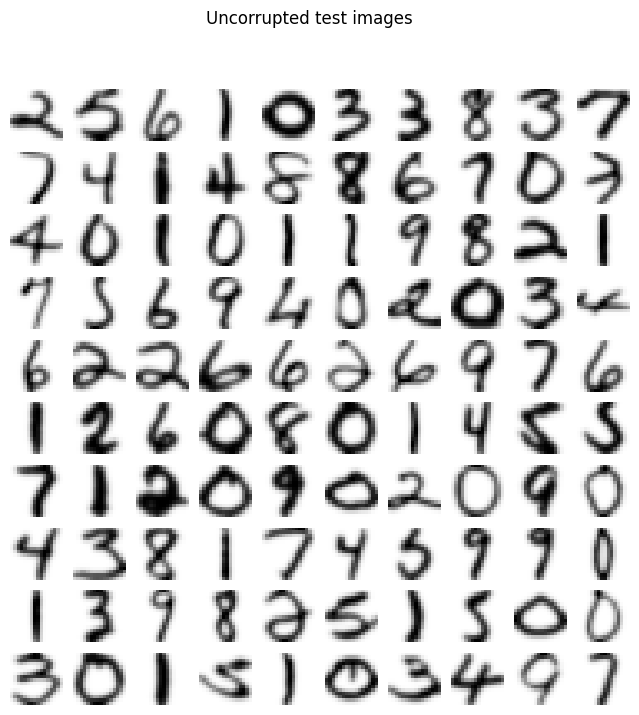

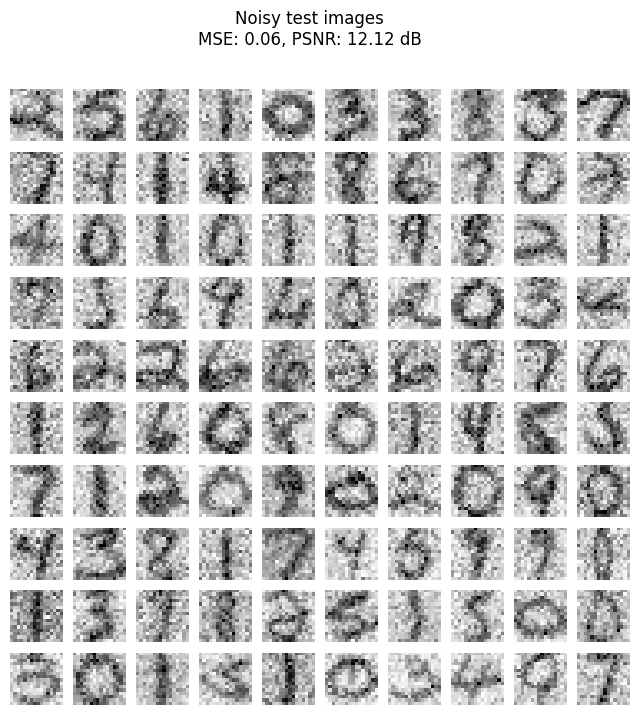

In [ ]:
def plot_digits(X, title):
    """helper function to plot 100 digits."""
    fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(8, 8))
    for img, ax in zip(X, axs.ravel()):
        ax.imshow(img.reshape((16, 16)), cmap="Greys")
        ax.axis("off")
    fig.suptitle(title, fontsize=12)

plot_digits(X_test, "Uncorrupted test images")
plot_digits(X_test_noisy, f"Noisy test images\nMSE: {mse_noisy_image.round(2)}, PSNR: {psnr_noisy_image.round(2)} dB")


PCA:

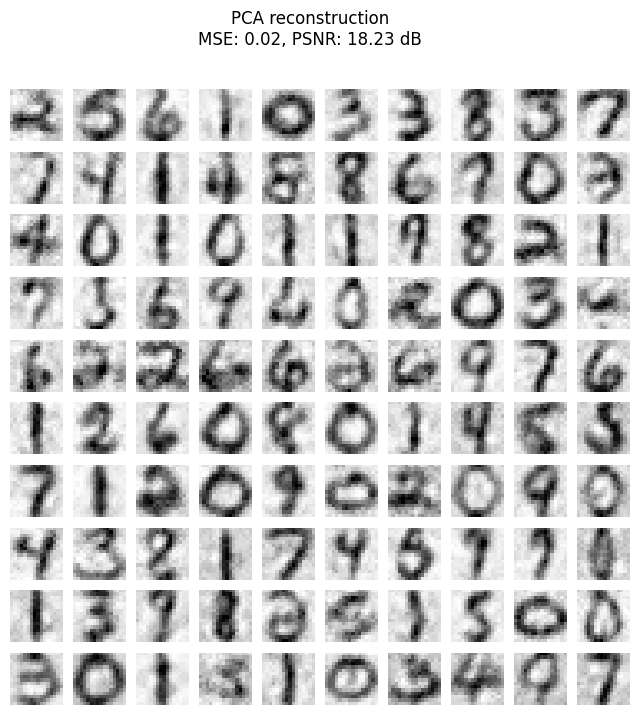

In [ ]:
# PCA:
pca = PCA(n_components=32)
pca.fit(X_train_noisy)
X_reconstructed_pca = pca.inverse_transform(pca.transform(X_test_noisy))

# calculate the MSE and PSNR and plot:
mse_pca  = np.mean((X_test - X_reconstructed_pca) ** 2)
psnr_pca = 10 * np.log10(max_I / mse_pca)
plot_digits(X_reconstructed_pca,
            f"PCA reconstruction\nMSE: {mse_pca.round(2)}, PSNR: {psnr_pca.round(2)} dB")

Kernel PCA:

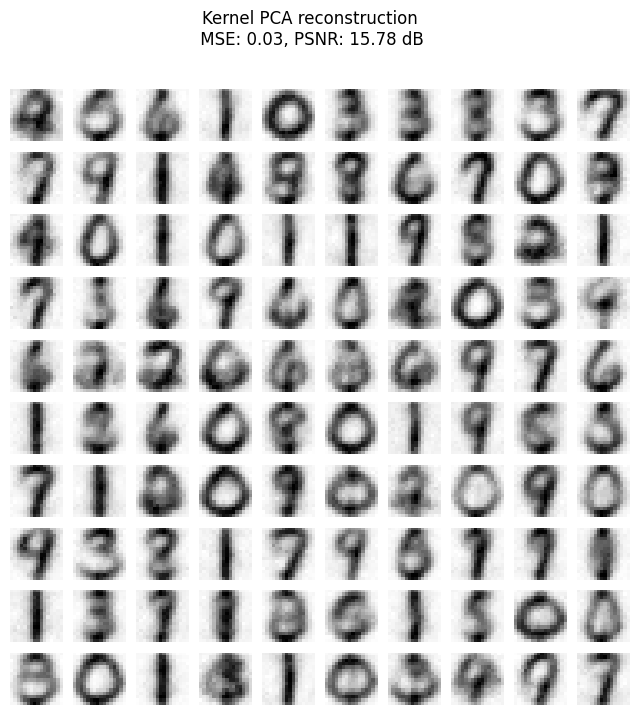

In [ ]:
# Kernel PCA:
kernel_pca = KernelPCA(n_components=400, kernel="rbf", gamma=1e-3,
                       fit_inverse_transform=True, alpha=5e-3 )
_ = kernel_pca.fit(X_train_noisy)
X_reconstructed_kernel_pca = kernel_pca.inverse_transform(kernel_pca.transform(X_test_noisy))

# calculate the MSE and PSNR and plot:
mse_kernel_pca  = np.mean((X_test - X_reconstructed_kernel_pca) ** 2)
psnr_kernel_pca = 10 * np.log10(max_I / mse_kernel_pca)
plot_digits(X_reconstructed_kernel_pca,
            f"Kernel PCA reconstruction\n MSE: {mse_kernel_pca.round(2)}, PSNR: {psnr_kernel_pca.round(2)} dB")

# Types of kernels in PCA

O comando KernelPca tem como um dos parêmetros o *kernel*, que consiste numa função que define como os dados são mapeados para um espaço de características de maior dimensão. São aceitos os seguintes kernels:


*   linear: produto interno entre os vetores de entrada
*   poly: necessita dos parâmetros *gamma*, *degree* e *coef0*. Consiste na expressão (gamma * produto interno + coef0) ** degree.
*   rbf: necessita do parâmetro *gamma*. É a expressão: exponencial(- gamma (distância euclidiana) ** 2)
*   sigmoid: necessita dos parâmetros *gamma* e *coef0*. Sua expressão é: tangente hiperbólica(gamma * produto interno + coef0)
*   cosine: mede a similaridade entre dois vetores com base no cosseno do ângulo entre eles. É calculado como: produto interno / (distância euclidiana de um * distância euclidiana do outro)
*   precomputed: permite um kernel feito pelo usuário

Mais em: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html#sklearn.decomposition.KernelPCA



In [ ]:
sklearn.decomposition.KernelPCA(n_components=None, *, kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None, alpha=1.0, fit_inverse_transform=False,
                                eigen_solver='auto', tol=0, max_iter=None, iterated_power='auto', remove_zero_eig=False, random_state=None, copy_X=True, n_jobs=None)

# Comparing differents kernels in Kernel PCA

In [ ]:
import numpy as np                                  # manipulate the image shape
from numpy.linalg import LinAlgError
import matplotlib.pyplot as plt                     # plot the image
from sklearn.datasets import fetch_olivetti_faces   # face data set (400 faces image)
from sklearn import decomposition                   # PCA
from skimage.util import random_noise               # adding noise to image
from sklearn.decomposition import PCA, KernelPCA
import pandas as pd

In [ ]:
faces = fetch_olivetti_faces()

In [ ]:
#DataFrame with results
df_scores = pd.DataFrame(columns=['Kernel', 'Gamma', 'Degree', 'Coef0', 'MSE', 'PSNR'])
print(df_scores)

Empty DataFrame
Columns: [Kernel, Gamma, Degree, Coef0, MSE, PSNR]
Index: []


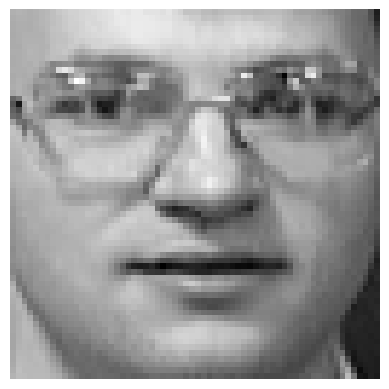

In [ ]:
#Original image
plt.imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
#Adding noise to image
facesNoise = random_noise(faces.data, mode='speckle')

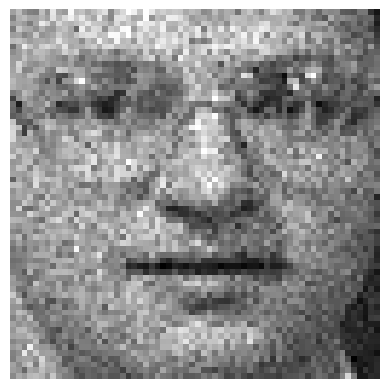

In [ ]:
plt.imshow(np.reshape(facesNoise[50], (64,64)), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
kernel_pca = KernelPCA(n_components=50, kernel='poly', gamma=1e-4, degree=4, coef0=10,
                                fit_inverse_transform=True, alpha=1e-2) # Increased alpha
_ = kernel_pca.fit(facesNoise)
facesReconstructed = kernel_pca.inverse_transform(kernel_pca.transform(facesNoise))

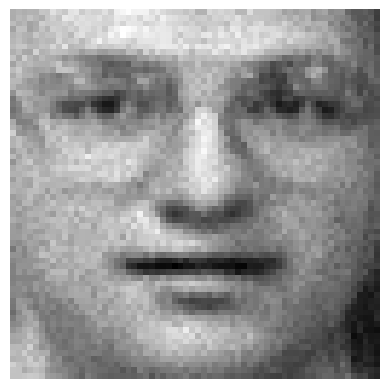

In [ ]:
plt.imshow(np.reshape(facesReconstructed[50], (64,64)), cmap='gray')
plt.axis('off')
plt.show()

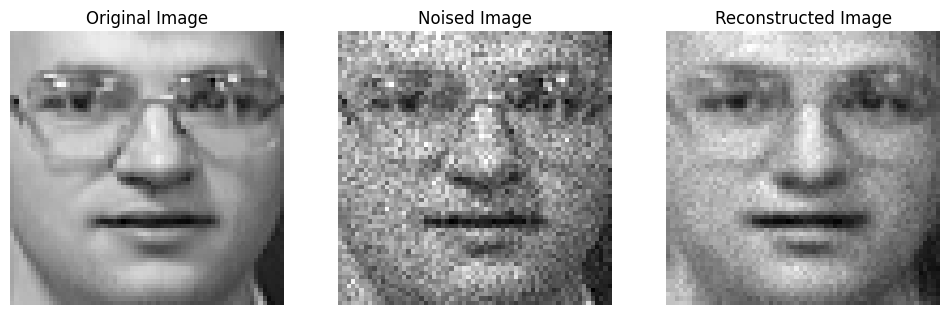

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.reshape(facesNoise[50], (64,64)), cmap='gray')
axs[1].set_title('Noised Image')
axs[1].axis('off')

axs[2].imshow(np.reshape(facesReconstructed[50], (64,64)), cmap='gray')
axs[2].set_title('Reconstructed Image')
axs[2].axis('off')

plt.show()

In [ ]:
#Calculating MSE and PSNR for noised image
max_I = faces.data[50].max()
mse_noisy_image  = np.mean((faces.data[50] - facesNoise[50]) ** 2)
psnr_noisy_image = 10 * np.log10(max_I / mse_noisy_image)

#Adding to the DatFrame with Scores
new_row = pd.DataFrame([{'Kernel': 'Noised', 'Gamma': np.nan, 'Degree': np.nan, 'Coef0': np.nan,'MSE': mse_noisy_image, 'PSNR': psnr_noisy_image}])
df_scores = pd.concat([df_scores, new_row], ignore_index=True)

print(f"Noisy test image\nMSE: {mse_noisy_image}, PSNR: {psnr_noisy_image} dB")

Noisy test image
MSE: 0.00968535299028507, PSNR: 19.82251691911561 dB


<ipython-input-7-67120015>:8: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, new_row], ignore_index=True)


In [ ]:
testes_dic = {
            'kernel': ['linear', 'rbf', 'poly', 'cosine', 'sigmoid'],
             'gamma': [1e-3, 1e-4, 1e-5, 1e-6],
             'degree': [2, 3, 4, 5, 6],
             'coef0': [0, 1, 10]
             }

for kernel in testes_dic['kernel']:
  for gamma in testes_dic['gamma']:
    for degree in testes_dic['degree']:
      for coef0 in testes_dic['coef0']:
        try:
          kernel_pca = KernelPCA(n_components=50, kernel=kernel, gamma=gamma, degree=degree, coef0=coef0,
                                fit_inverse_transform=True, alpha=1e-2) # Increased alpha
          _ = kernel_pca.fit(facesNoise)
          facesReconstructed = kernel_pca.inverse_transform(kernel_pca.transform(facesNoise))

          #Calculating MSE and PSNR for reconstructed image
          max_I = faces.data[50].max()
          mse_reconstructed_image  = np.mean((faces.data[50] - facesReconstructed[50]) ** 2)
          psnr_reconstructed_image = 10 * np.log10(max_I / mse_reconstructed_image)

          #Adding to the DatFrame with Scores
          new_row = pd.DataFrame([{'Kernel': kernel, 'Gamma': gamma, 'Degree': degree, 'Coef0': coef0,'MSE': mse_reconstructed_image, 'PSNR': psnr_reconstructed_image}])
          df_scores = pd.concat([df_scores, new_row], ignore_index=True)
        except LinAlgError:
          print(f"LinAlgError with Kernel: {kernel}, Gamma: {gamma}, Degree: {degree}, Coef0: {coef0}")
          continue # Skip to the next iteration if a LinAlgError occurs

<ipython-input-55-3679472599>:25: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores = pd.concat([df_scores, new_row], ignore_index=True)


In [ ]:
df_scores

,Kernel,Gamma,Degree,Coef0,MSE,PSNR
0,linear,0.001000,2,0,0.312057,4.741338
1,linear,0.001000,2,1,0.312057,4.741338
2,linear,0.001000,2,10,0.312057,4.741338
3,linear,0.001000,3,0,0.312057,4.741338
4,linear,0.001000,3,1,0.312057,4.741338
...,...,...,...,...,...,...
295,sigmoid,0.000001,5,1,0.015667,17.733701
296,sigmoid,0.000001,5,10,0.015667,17.733904
297,sigmoid,0.000001,6,0,0.419198,3.459484
298,sigmoid,0.000001,6,1,0.015667,17.733701


In [ ]:
df_scores.to_csv('speckle_scores.csv', index=False)

In [ ]:
df_scores.sort_values(by='PSNR', ascending=False)

,Kernel,Gamma,Degree,Coef0,MSE,PSNR
125,poly,0.00100,3,10,0.001680,27.431588
143,poly,0.00010,4,10,0.001760,27.228195
130,poly,0.00100,5,1,0.001840,27.035122
133,poly,0.00100,6,1,0.001888,26.922976
161,poly,0.00001,5,10,0.001907,26.880270
...,...,...,...,...,...,...
246,sigmoid,0.00100,4,0,0.419597,3.455343
240,sigmoid,0.00100,2,0,0.419597,3.455343
243,sigmoid,0.00100,3,0,0.419597,3.455343
249,sigmoid,0.00100,5,0,0.419597,3.455343


# Discussion

Conforme os experimentos, a função kernel que melhor removeu o ruído da imagem foi poly, com gamma = 0.0010, grau = 3.0 e coeficiente = 1.0, resultando, assim, o erro de mínimos quadrados: 0.001787 e PSNR: 27.162223 db.

Contudo, alguns apontamentos pertinentes:


*   O experimento fora aplicado somente para a face de posição 50 no dataset
*   O número de componentes principais foi 50 para todas os experimentos
*   Alpha foi igual (0.005) para todos os experimentos. Sendo alpha o hiperparâmetro da regressão.
*   O tipo do ruído foi gaussiano com 5%, em todos os experimentos



# Comparing differents numbers of components (PCA)

In [ ]:
faces = fetch_olivetti_faces()

In [ ]:
#DataFrame with results
df_scores_pca_components = pd.DataFrame(columns=['N', 'Noise', 'MSE', 'PSNR'])
print(df_scores_pca_components)

Empty DataFrame
Columns: [N, Noise, MSE, PSNR]
Index: []


In [ ]:
noises_dic = {
            'noise': ['gaussian', 'localvar', 'salt', 'pepper', 's&p', 'speckle']
            }

for noise in noises_dic['noise']:
  facesNoise = random_noise(faces.data, mode=noise)

  for i in range(200):
    try:
      pca = PCA(n_components=i)
      pca.fit(facesNoise)
      faces_reconstructed_pca = pca.inverse_transform(pca.transform(facesNoise))

      #Calculating MSE and PSNR for reconstructed image
      max_I = faces.data[50].max()
      mse_reconstructed_image_pca  = np.mean((faces.data[50] - faces_reconstructed_pca[50]) ** 2)
      psnr_reconstructed_image_pca = 10 * np.log10(max_I / mse_reconstructed_image_pca)

      #Adding to the DatFrame with Scores
      new_row = pd.DataFrame([{'N': i, 'Noise': noise, 'MSE': mse_reconstructed_image_pca, 'PSNR': psnr_reconstructed_image_pca}])
      df_scores_pca_components = pd.concat([df_scores_pca_components, new_row], ignore_index=True)
    except:
      print("")
      continue

In [ ]:
df_scores_pca_components.sort_values(by='PSNR', ascending=False).to_csv('pca_components_scores.csv', index=False)

In [ ]:
facesNoiseSpeckle = random_noise(faces.data, mode='speckle')

pca = PCA(n_components=109)
pca.fit(facesNoiseSpeckle)
facesReconstructedSpeckle = pca.inverse_transform(pca.transform(facesNoiseSpeckle))

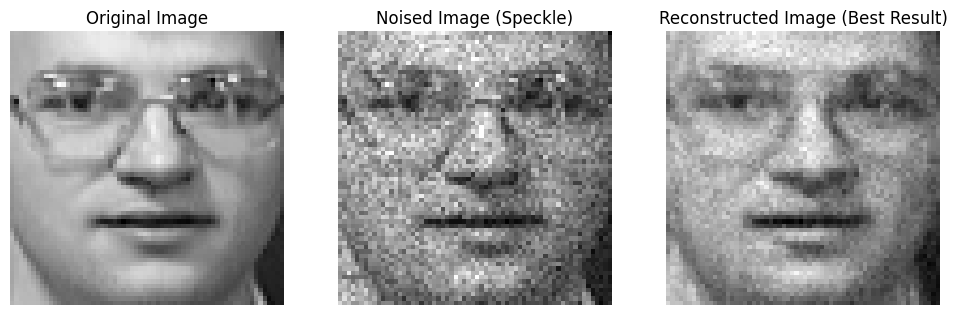

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].imshow(np.reshape(faces.data[50], (64,64)), cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(np.reshape(facesNoiseSpeckle[50], (64,64)), cmap='gray')
axs[1].set_title('Noised Image (Speckle)')
axs[1].axis('off')

axs[2].imshow(np.reshape(facesReconstructedSpeckle[50], (64,64)), cmap='gray')
axs[2].set_title('Reconstructed Image (Best Result)')
axs[2].axis('off')

plt.show()

# Comparing differents numbers of components (Kernel PCA)

In [ ]:
#DataFrame with results
df_scores_kernel_components = pd.DataFrame(columns=['N', 'Kernel', 'Gamma', 'Degree', 'Coef0', 'MSE', 'PSNR'])
print(df_scores_kernel_components)

Empty DataFrame
Columns: [N, Kernel, Gamma, Degree, Coef0, MSE, PSNR]
Index: []


In [ ]:
noises_dic = {
            'noise': ['gaussian', 'localvar', 'salt', 'pepper', 's&p', 'speckle']
            }

for noise in noises_dic['noise']:
  facesNoise = random_noise(faces.data, mode=noise)

  for i in range(200):
    try:
      kernel_pca = KernelPCA(n_components=i, kernel='poly', gamma=1e-3, degree=3, coef0=1,
                                fit_inverse_transform=True, alpha=1e-2)
      _ = kernel_pca.fit(facesNoise)
      facesReconstructed_kernel = kernel_pca.inverse_transform(kernel_pca.transform(facesNoise))

      #Calculating MSE and PSNR for reconstructed image
      max_I = faces.data[50].max()
      mse_reconstructed_image_kernel = np.mean((faces.data[50] - facesReconstructed_kernel[50]) ** 2)
      psnr_reconstructed_image_kernel = 10 * np.log10(max_I / mse_reconstructed_image_kernel)

      #Adding to the DatFrame with Scores
      new_row = pd.DataFrame([{'N': i, 'Kernel':'poly', 'Gamma':1e-3, 'Degree':3, 'Coef0':1, 'Noise': noise, 'MSE': mse_reconstructed_image_kernel, 'PSNR': psnr_reconstructed_image_kernel}])
      df_scores_kernel_components = pd.concat([df_scores_kernel_components, new_row], ignore_index=True)
    except:
      print("")
      continue

/tmp/ipython-input-1361768163.py:22: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_scores_kernel_components = pd.concat([df_scores_kernel_components, new_row], ignore_index=True)


In [ ]:
df_scores_kernel_components.sort_values(by='PSNR', ascending=False)

,N,Kernel,Gamma,Degree,Coef0,MSE,PSNR,Noise
1191,197,poly,0.001,3,1,0.001859,26.991610,speckle
1192,198,poly,0.001,3,1,0.001859,26.990446,speckle
1193,199,poly,0.001,3,1,0.001860,26.988923,speckle
1190,196,poly,0.001,3,1,0.001860,26.987404,speckle
1188,194,poly,0.001,3,1,0.001862,26.984573,speckle
...,...,...,...,...,...,...,...,...
796,1,poly,0.001,3,1,0.010171,19.610178,s&p
0,1,poly,0.001,3,1,0.010276,19.565509,gaussian
199,1,poly,0.001,3,1,0.010300,19.555249,localvar
995,1,poly,0.001,3,1,0.010321,19.546436,speckle


# Optuna for hyperparams optimization

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.9/400.9 kB 9.2 MB/s eta 0:00:00


In [ ]:
import numpy as np
from numpy.linalg import LinAlgError
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_olivetti_faces
from sklearn import decomposition
from skimage.util import random_noise
from sklearn.decomposition import PCA, KernelPCA
import pandas as pd
import optuna
import optuna.logging
from sklearn.preprocessing import StandardScaler
import warnings
from scipy.linalg import LinAlgWarning

In [ ]:
# Usando Optuna para encontrar a melhor combinação de hiperparâmetros para imagens com um ruído em específico
def objective(trial, faces, noise):
  facesNoise = random_noise(faces.data, mode=noise)

  kernel = trial.suggest_categorical('kernel', ['linear', 'rbf', 'poly', 'cosine', 'sigmoid'])
  gamma = trial.suggest_float('gamma', 1e-5, 10, log=True)
  degree = trial.suggest_int('degree', 2, 6)
  coef0 = trial.suggest_int('coef0', 0, 10)
  components = trial.suggest_int('components', 2, 200)
  alpha = trial.suggest_float('alpha', 1e-5, 10, log=True)

  try:
    kernel_pca = KernelPCA(n_components=components, kernel=kernel, gamma=gamma, degree=degree, coef0=coef0,
                          fit_inverse_transform=True, alpha=alpha)
    _ = kernel_pca.fit(facesNoise)
    facesReconstructed = kernel_pca.inverse_transform(kernel_pca.transform(facesNoise))

    max_I = faces.data.max()
    mse_reconstructed = np.mean((faces.data - facesReconstructed) ** 2)
    if mse_reconstructed == 0:
            return 100.0
    psnr_reconstructed = 10 * np.log10(max_I / mse_reconstructed)

    return psnr_reconstructed
  except:
    return 0


In [ ]:
olivetti_faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
noises = ['gaussian', 'localvar', 'salt', 'pepper', 's&p', 'speckle', 'poisson']

warnings.filterwarnings("ignore", category=LinAlgWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
optuna.logging.set_verbosity(optuna.logging.WARNING)
for noise in noises:
    study_kernel = optuna.create_study(direction='maximize')
    study_kernel.optimize(lambda trial: objective(trial, olivetti_faces, noise), n_trials=200)
    print(f"\nOtimização do ruído: {noise}")
    print(f"Melhor valor (PSNR médio): {study_kernel.best_value}")
    print("Melhores hiperparâmetros:")
    for key, value in study_kernel.best_params.items():
        print(f"  {key}: {value}")
    print("\n")


Otimização do ruído: gaussian
Melhor valor (PSNR médio): 25.011247563298458
Melhores hiperparâmetros:
  kernel: rbf
  gamma: 0.0002389681419676442
  degree: 5
  coef0: 9
  components: 148
  alpha: 2.1220479040967464e-05



Otimização do ruído: localvar
Melhor valor (PSNR médio): 25.000424040599864
Melhores hiperparâmetros:
  kernel: poly
  gamma: 1.4026940638696848e-05
  degree: 5
  coef0: 8
  components: 125
  alpha: 7.703437744036502



Otimização do ruído: salt
Melhor valor (PSNR médio): 23.563241958618164
Melhores hiperparâmetros:
  kernel: rbf
  gamma: 0.001595020894086422
  degree: 5
  coef0: 7
  components: 94
  alpha: 0.0008967026840424499



Otimização do ruído: pepper
Melhor valor (PSNR médio): 22.812803268432617
Melhores hiperparâmetros:
  kernel: rbf
  gamma: 0.0005441439434196156
  degree: 3
  coef0: 3
  components: 97
  alpha: 0.0001603827340023363



Otimização do ruído: s&p
Melhor valor (PSNR médio): 23.844621658325195
Melhores hiperparâmetros:
  kernel: rbf
  gamma: 0

# Optuna for number of PC optimization

In [ ]:
def objective(trial, faces, noise):
  facesNoise = random_noise(faces.data, mode=noise)

  components = trial.suggest_int('components', 2, 200)

  try:
    pca = PCA(n_components=components)
    pca.fit(facesNoise)
    faces_reconstructed_pca = pca.inverse_transform(pca.transform(facesNoise))

    max_I = faces.data.max()
    mse_reconstructed = np.mean((faces.data - faces_reconstructed_pca) ** 2)
    if mse_reconstructed == 0:
            return 100.0
    psnr_reconstructed = 10 * np.log10(max_I / mse_reconstructed)

    return psnr_reconstructed
  except:
    return 0


In [ ]:
noises = ['gaussian', 'localvar', 'salt', 'pepper', 's&p', 'speckle', 'poisson']

warnings.filterwarnings("ignore", category=LinAlgWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
optuna.logging.set_verbosity(optuna.logging.WARNING)
for noise in noises:
    study = optuna.create_study(direction='maximize')
    study.optimize(lambda trial: objective(trial, olivetti_faces, noise), n_trials=100)
    print(f"\nOtimização do ruído: {noise}")
    print(f"Melhor valor (PSNR médio): {study.best_value}")
    print("Melhor número de componentes principais:")
    for key, value in study.best_params.items():
        print(f"  {key}: {value}")
    print("\n")


Otimização do ruído: gaussian
Melhor valor (PSNR médio): 24.0254647677417
Melhor número de componentes principais:
  components: 53



Otimização do ruído: localvar
Melhor valor (PSNR médio): 24.01668962380018
Melhor número de componentes principais:
  components: 55



Otimização do ruído: salt
Melhor valor (PSNR médio): 23.079347610473633
Melhor número de componentes principais:
  components: 39



Otimização do ruído: pepper
Melhor valor (PSNR médio): 22.426912307739258
Melhor número de componentes principais:
  components: 35



Otimização do ruído: s&p
Melhor valor (PSNR médio): 23.296192169189453
Melhor número de componentes principais:
  components: 39



Otimização do ruído: speckle
Melhor valor (PSNR médio): 26.526194715630517
Melhor número de componentes principais:
  components: 123



Otimização do ruído: poisson
Melhor valor (PSNR médio): 27.821075445892273
Melhor número de componentes principais:
  components: 170


